In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dados_diabetes.csv')
df_d = df[df['Outcome']==1]
df_nd = df[df['Outcome']==0]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Pessoas com diabetes

In [3]:
df_d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
757,0,123.0,72.0,32.0,169.5,36.3,0.258,52,1
759,6,190.0,92.0,32.0,169.5,35.5,0.278,66,1
761,9,170.0,74.0,31.0,169.5,44.0,0.403,43,1


## Pessoas sem diabetes

In [4]:
df_nd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
5,5,116.0,74.0,27.0,102.5,25.6,0.201,30,0
7,10,115.0,70.0,27.0,102.5,35.3,0.134,29,0
10,4,110.0,92.0,27.0,102.5,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,27.0,102.5,22.5,0.142,33,0
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [5]:
def histogram(column,title,place,width):
    hist_nd, bin_edges_nd = np.histogram(df_nd[column])
    hist_d, bin_edges_d = np.histogram(df_d[column])

    hist_d = hist_d/268
    hist_nd = hist_nd/500
    
    plt.subplot(5, 2, place)
    plt.title(title)
    plt.bar(bin_edges_d[:-1], hist_d, width = width, alpha=0.7, color = 'red', label='Negativo para Diabetes')
    plt.bar(bin_edges_nd[:-1], hist_nd, width = width, alpha=0.5, color = 'blue', label='Positivo para Diabetes')

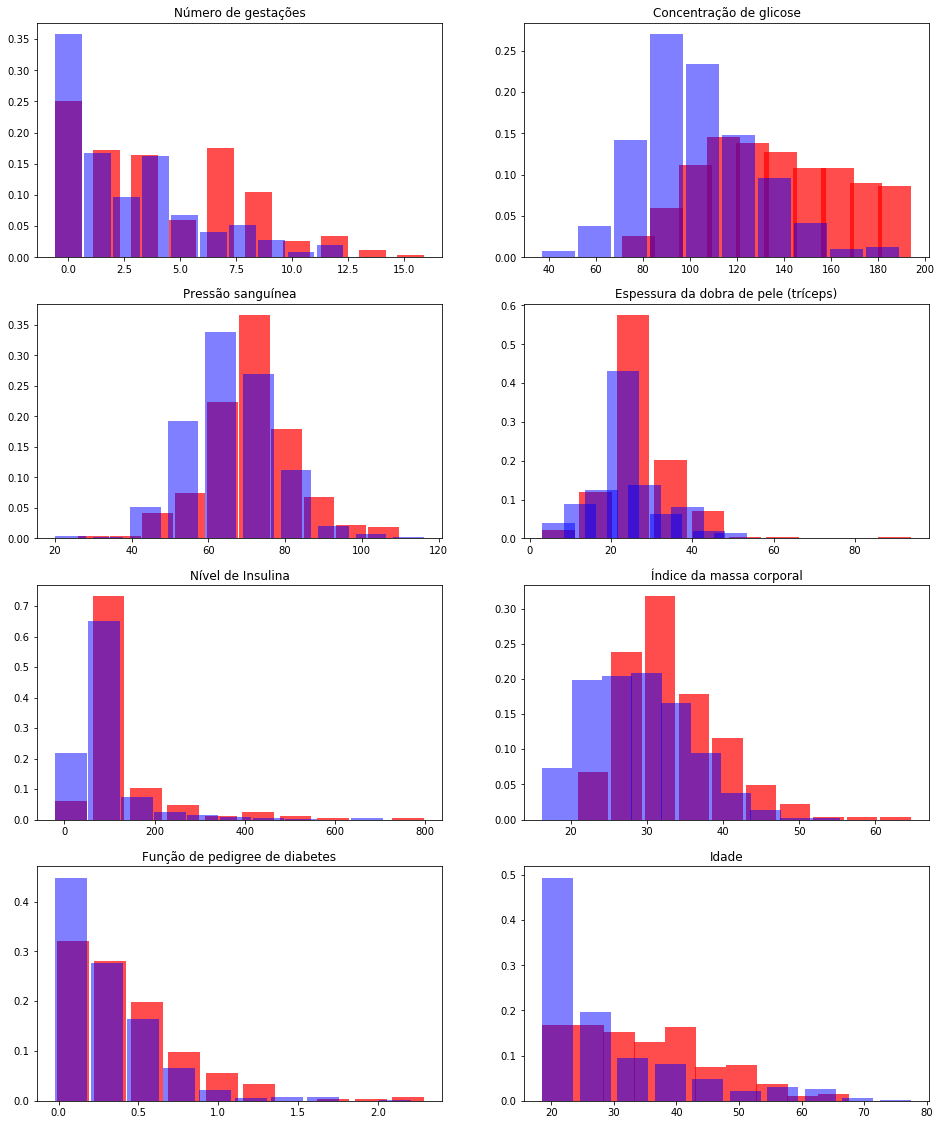

In [6]:
fig = plt.figure(figsize = (16,25))
histogram('Pregnancies','Número de gestações',1,1.2)
histogram('Glucose','Concentração de glicose',2,14)
histogram('BloodPressure','Pressão sanguínea',3,8)
histogram('SkinThickness','Espessura da dobra de pele (tríceps)',4,8)
histogram('Insulin','Nível de Insulina',5,70)
histogram('BMI','Índice da massa corporal',6,4)
histogram('DiabetesPedigreeFunction','Função de pedigree de diabetes',7,0.2)
histogram('Age','Idade',8,5)

In [7]:
y = df['Outcome'].values
x_data = df.drop(['Outcome'],axis =1)

y_d = df_d['Outcome'].values
x_d = df_d.drop(['Outcome'],axis =1)

y_nd = df_nd['Outcome'].values
x_nd = df_nd.drop(['Outcome'],axis =1)

## Normalization

In [8]:
X = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

X = X.values

X_d = (x_d - np.min(x_d))/(np.max(x_d)-np.min(x_d)).values
X_nd = (x_nd - np.min(x_nd))/(np.max(x_nd)-np.min(x_nd)).values

X_d = X_d.values
X_nd = X_nd.values
print(X)

[[0.35294118 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]


In [10]:
from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 122580)

x_d_train, x_d_valid, y_d_train, y_d_valid = train_test_split(X_d, y_d, test_size = 0.2, random_state = 122580)

x_nd_train, x_nd_valid, y_nd_train, y_nd_valid = train_test_split(X_nd, y_nd, test_size = 0.2, random_state = 122580)

x_train = np.concatenate((x_d_train, x_nd_train))

y_train = np.concatenate((y_d_train, y_nd_train))

x_valid = np.concatenate((x_d_valid, x_nd_valid))

y_valid = np.concatenate((y_d_valid, y_nd_valid))

print("x_train.shape : ", x_train.shape)
print("x_valid.shape : ", x_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)


x_train.shape :  (614, 8)
x_valid.shape :  (154, 8)
y_train.shape :  (614,)
y_valid.shape :  (154,)


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def models(n):
    print('Número de Neuronios na Camada Intermediária: ',2**n)
    model = keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(2**n, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
        ])

    model.compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min')
    history = model.fit(x_train, y_train, epochs=200, batch_size = 64, 
              validation_data=(x_valid, y_valid),verbose = False)

    fig = plt.figure(figsize = (15,10))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='best')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','valid'], loc='best')
    plt.show()
    print('Validation Accuracy: ',history.history['val_accuracy'][-1])
    print('Validation Loss: ',history.history['val_loss'][-1],'\n')
    last_acc = history.history['val_accuracy'][-1]
    last_loss = history.history['val_loss'][-1]
    return last_acc,last_loss

Número de Neuronios na Camada Intermediária:  16


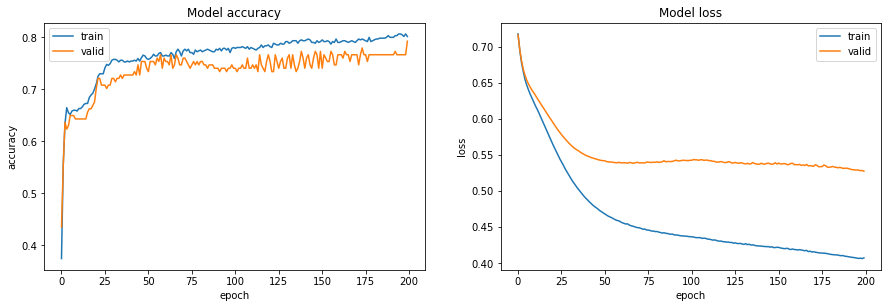

Validation Accuracy:  0.7922078
Validation Loss:  0.5273378932630861 

Número de Neuronios na Camada Intermediária:  32


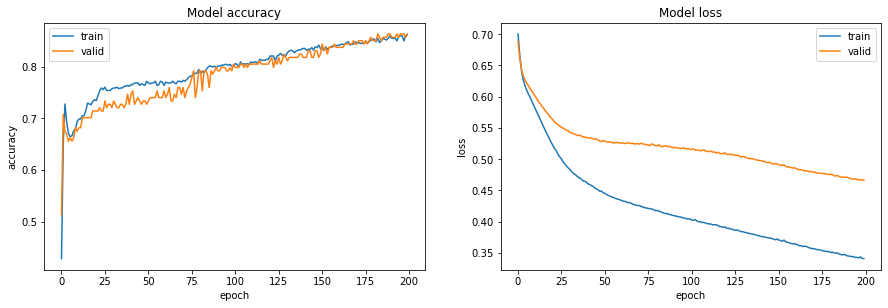

Validation Accuracy:  0.8636364
Validation Loss:  0.4659203728298088 

Número de Neuronios na Camada Intermediária:  64


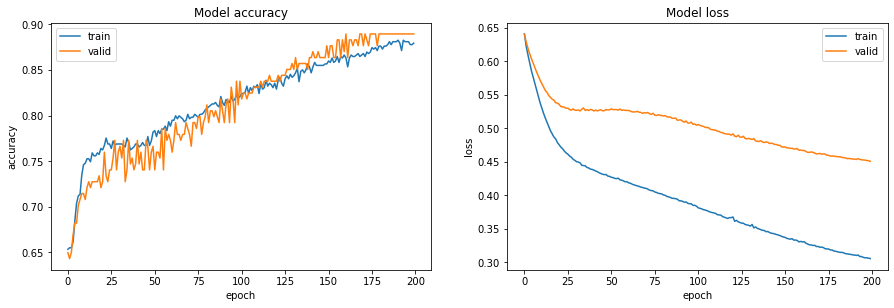

Validation Accuracy:  0.8896104
Validation Loss:  0.4505821001994145 

Número de Neuronios na Camada Intermediária:  128


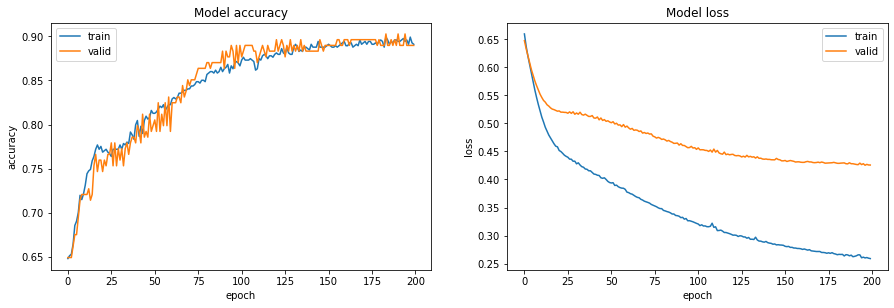

Validation Accuracy:  0.8896104
Validation Loss:  0.4258014048848833 

Número de Neuronios na Camada Intermediária:  256


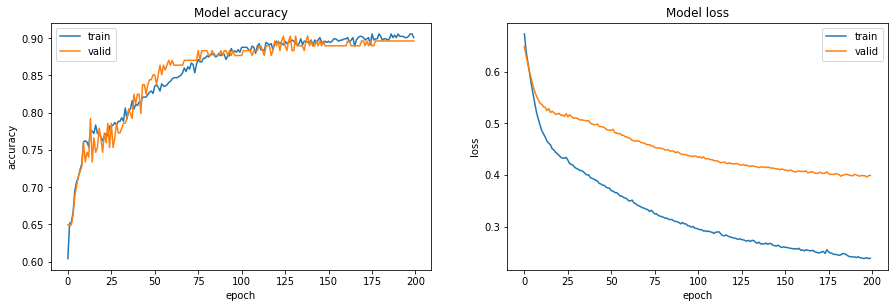

Validation Accuracy:  0.8961039
Validation Loss:  0.39925896889203555 

Número de Neuronios na Camada Intermediária:  512


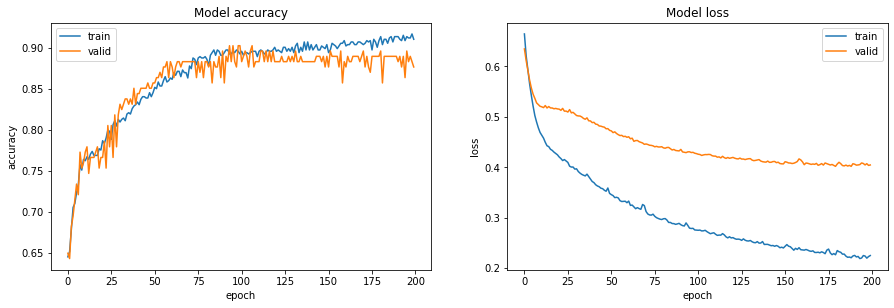

Validation Accuracy:  0.8766234
Validation Loss:  0.4042563751920477 

Número de Neuronios na Camada Intermediária:  1024


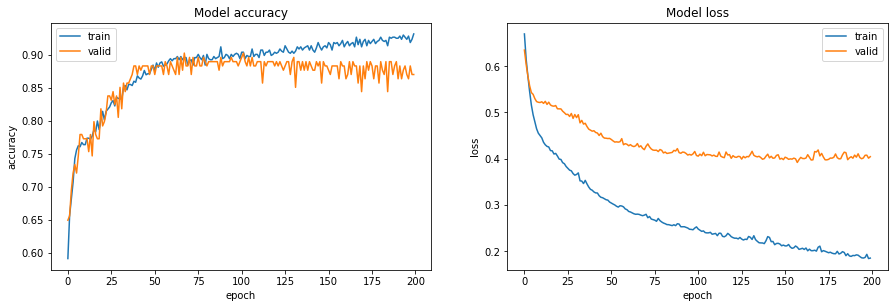

Validation Accuracy:  0.8701299
Validation Loss:  0.4041845543043954 

Número de Neuronios na Camada Intermediária:  2048


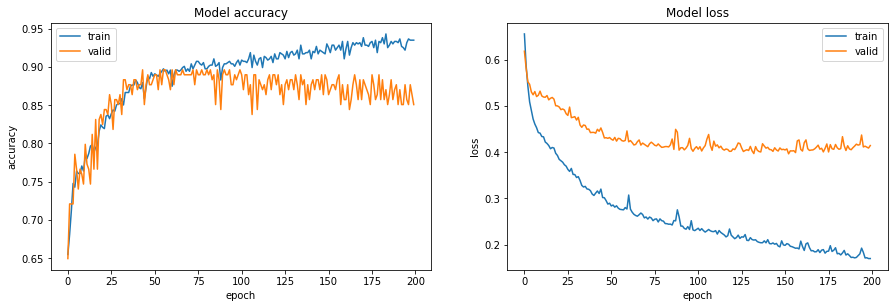

Validation Accuracy:  0.85064936
Validation Loss:  0.41410685166136013 

Número de Neuronios na Camada Intermediária:  4096


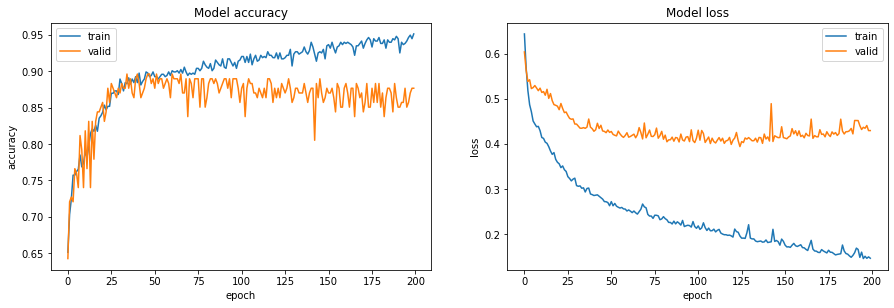

Validation Accuracy:  0.8766234
Validation Loss:  0.4297105073928833 

Número de Neuronios na Camada Intermediária:  8192


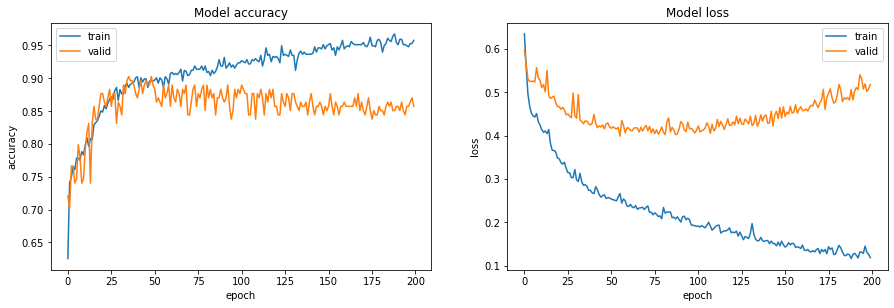

Validation Accuracy:  0.85714287
Validation Loss:  0.5171297269982177 



In [24]:
la = []
ll = []
for i in range(4,14):
    last_acc,last_loss = models(i)
    la.append(last_acc)
    ll.append(last_loss)

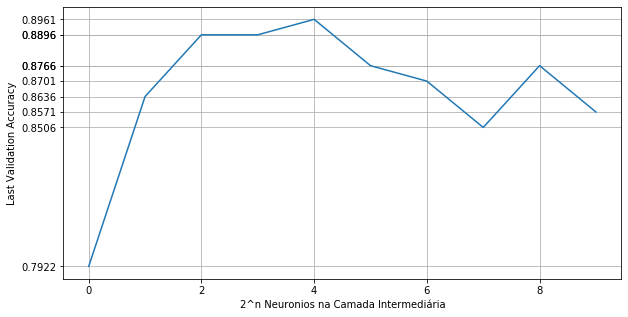

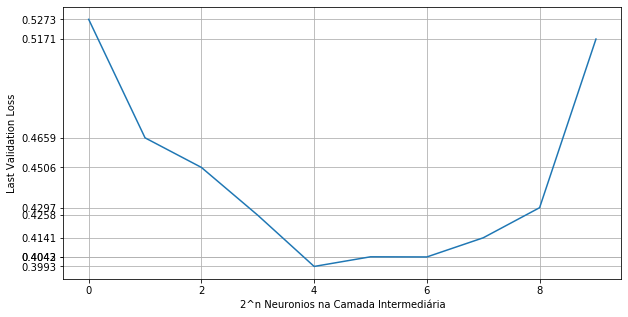

In [28]:
fig = plt.figure(figsize = (10,5))
plt.plot(la)
plt.ylabel('Last Validation Accuracy')
plt.xlabel('2^n Neuronios na Camada Intermediária')
plt.yticks(la)
plt.grid('on')

fig = plt.figure(figsize = (10,5))
plt.plot(ll)
plt.ylabel('Last Validation Loss')
plt.xlabel('2^n Neuronios na Camada Intermediária')
plt.yticks(ll)
plt.grid('on')

## Melhor => n=4, 256


Epoch 00001: val_loss improved from inf to 0.65131, saving model to best_model_loss.h5

Epoch 00002: val_loss improved from 0.65131 to 0.63528, saving model to best_model_loss.h5

Epoch 00003: val_loss improved from 0.63528 to 0.62302, saving model to best_model_loss.h5

Epoch 00004: val_loss improved from 0.62302 to 0.60959, saving model to best_model_loss.h5

Epoch 00005: val_loss improved from 0.60959 to 0.59677, saving model to best_model_loss.h5

Epoch 00006: val_loss improved from 0.59677 to 0.58375, saving model to best_model_loss.h5

Epoch 00007: val_loss improved from 0.58375 to 0.57276, saving model to best_model_loss.h5

Epoch 00008: val_loss improved from 0.57276 to 0.56223, saving model to best_model_loss.h5

Epoch 00009: val_loss improved from 0.56223 to 0.55312, saving model to best_model_loss.h5

Epoch 00010: val_loss improved from 0.55312 to 0.54596, saving model to best_model_loss.h5

Epoch 00011: val_loss improved from 0.54596 to 0.53941, saving model to best_model_


Epoch 00101: val_loss did not improve from 0.44449

Epoch 00102: val_loss did not improve from 0.44449

Epoch 00103: val_loss improved from 0.44449 to 0.44362, saving model to best_model_loss.h5

Epoch 00104: val_loss improved from 0.44362 to 0.44189, saving model to best_model_loss.h5

Epoch 00105: val_loss improved from 0.44189 to 0.44154, saving model to best_model_loss.h5

Epoch 00106: val_loss improved from 0.44154 to 0.44133, saving model to best_model_loss.h5

Epoch 00107: val_loss improved from 0.44133 to 0.44014, saving model to best_model_loss.h5

Epoch 00108: val_loss did not improve from 0.44014

Epoch 00109: val_loss did not improve from 0.44014

Epoch 00110: val_loss improved from 0.44014 to 0.43938, saving model to best_model_loss.h5

Epoch 00111: val_loss improved from 0.43938 to 0.43920, saving model to best_model_loss.h5

Epoch 00112: val_loss improved from 0.43920 to 0.43811, saving model to best_model_loss.h5

Epoch 00113: val_loss improved from 0.43811 to 0.43708,


Epoch 00223: val_loss did not improve from 0.41000

Epoch 00224: val_loss did not improve from 0.41000

Epoch 00225: val_loss did not improve from 0.41000

Epoch 00226: val_loss did not improve from 0.41000

Epoch 00227: val_loss did not improve from 0.41000

Epoch 00228: val_loss did not improve from 0.41000

Epoch 00229: val_loss improved from 0.41000 to 0.40919, saving model to best_model_loss.h5

Epoch 00230: val_loss did not improve from 0.40919

Epoch 00231: val_loss improved from 0.40919 to 0.40908, saving model to best_model_loss.h5

Epoch 00232: val_loss improved from 0.40908 to 0.40817, saving model to best_model_loss.h5

Epoch 00233: val_loss did not improve from 0.40817

Epoch 00234: val_loss did not improve from 0.40817

Epoch 00235: val_loss did not improve from 0.40817

Epoch 00236: val_loss did not improve from 0.40817

Epoch 00237: val_loss did not improve from 0.40817

Epoch 00238: val_loss did not improve from 0.40817

Epoch 00239: val_loss did not improve from 0.40

Epoch 00376: val_loss did not improve from 0.40636

Epoch 00377: val_loss did not improve from 0.40636

Epoch 00378: val_loss did not improve from 0.40636

Epoch 00379: val_loss did not improve from 0.40636

Epoch 00380: val_loss did not improve from 0.40636

Epoch 00381: val_loss did not improve from 0.40636

Epoch 00382: val_loss did not improve from 0.40636

Epoch 00383: val_loss did not improve from 0.40636

Epoch 00384: val_loss did not improve from 0.40636

Epoch 00385: val_loss did not improve from 0.40636

Epoch 00386: val_loss did not improve from 0.40636

Epoch 00387: val_loss did not improve from 0.40636

Epoch 00388: val_loss did not improve from 0.40636

Epoch 00389: val_loss did not improve from 0.40636

Epoch 00390: val_loss did not improve from 0.40636

Epoch 00391: val_loss did not improve from 0.40636

Epoch 00392: val_loss did not improve from 0.40636

Epoch 00393: val_loss did not improve from 0.40636

Epoch 00394: val_loss did not improve from 0.40636

Epoch 00395:

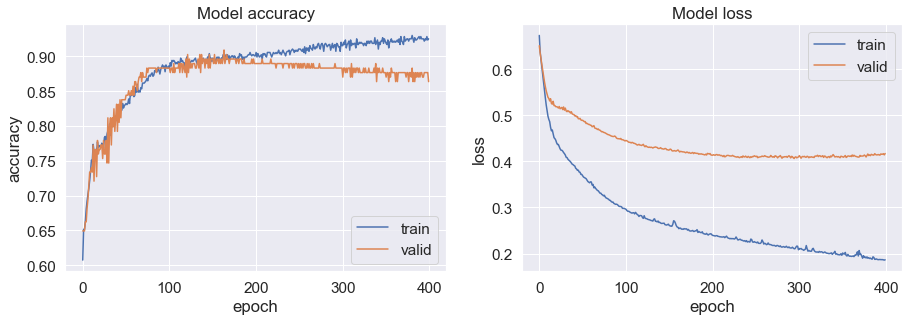

Validation Accuracy:  0.8636364
Validation Loss:  0.41716389029056994 



In [75]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
        ])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

checkpoint = ModelCheckpoint('best_model_loss.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history = model.fit(x_train, y_train, epochs=400, batch_size = 64, 
          validation_data=(x_valid, y_valid), callbacks = callbacks_list, verbose = False)

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='best')

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='best')
plt.show()
print('Validation Accuracy: ',history.history['val_accuracy'][-1])
print('Validation Loss: ',history.history['val_loss'][-1],'\n')
last_acc_best = history.history['val_accuracy'][-1]
last_loss_best = history.history['val_loss'][-1]

In [78]:
model.load_weights("best_model_loss.h5")
scores = model.evaluate(x_valid, y_valid,verbose = False)
print('Checkpoint on Minimum Loss')
print('Best Accuracy: %.2f \n Loss : %f \n'%(scores[1]*100,scores[0]))

model.load_weights("best_model_acc.h5")
scores = model.evaluate(x_valid, y_valid,verbose = False)
print('Checkpoint on Maximum Accuracy')
print('Best Accuracy: %.2f \n Loss : %f'%(scores[1]*100,scores[0]))

Checkpoint on Minimum Loss
Best Accuracy: 88.31 
 Loss : 0.406362 

Checkpoint on Maximum Accuracy
Best Accuracy: 90.26 
 Loss : 0.426401


In [79]:
model.load_weights("best_model_loss.h5")
y_predict_l = model.predict_classes(x_valid)
model.load_weights("best_model_acc.h5")
y_predict_a = model.predict_classes(x_valid)
print(y_predict)
print(y_valid)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Checkpoint on Minimum Loss


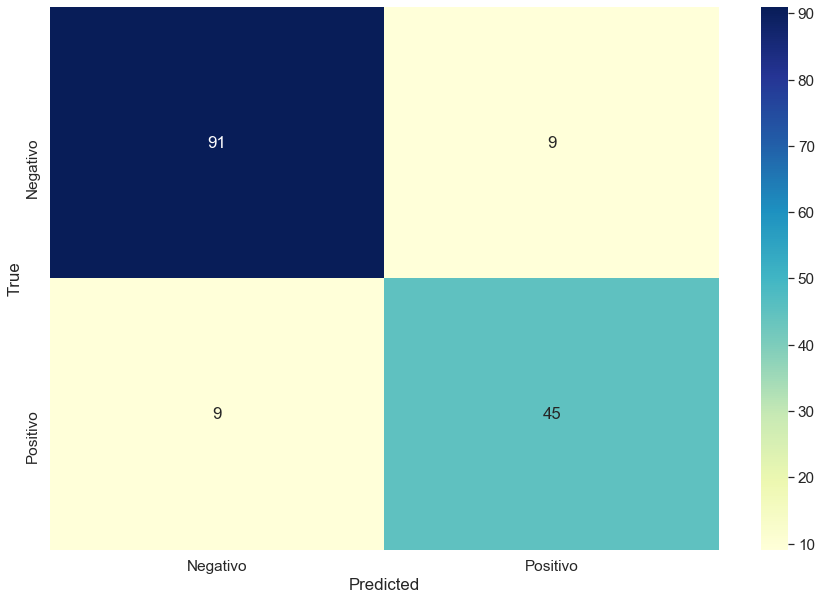

Checkpoint on Maximum Accuracy


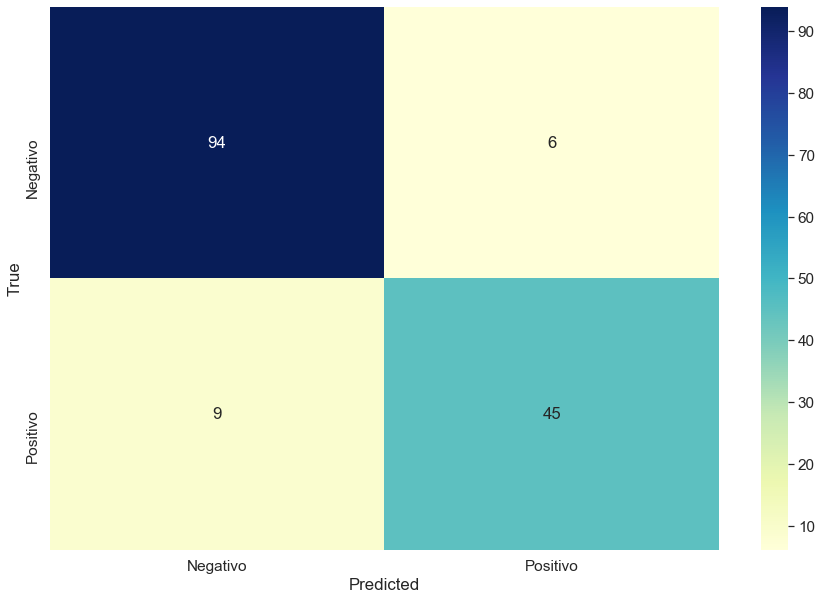

In [80]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn

print('Checkpoint on Minimum Loss')
conf = confusion_matrix(y_valid, y_predict_l)

# df_cm = pd.DataFrame(conf, index = [i for i in "012345"],
#                   columns = [i for i in "012345"])
df_cm = pd.DataFrame(conf, index = ['Negativo','Positivo'],
                  columns = ['Negativo','Positivo'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True,fmt='g', cmap="YlGnBu")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


print('Checkpoint on Maximum Accuracy')
conf = confusion_matrix(y_valid, y_predict_a)

# df_cm = pd.DataFrame(conf, index = [i for i in "012345"],
#                   columns = [i for i in "012345"])
df_cm = pd.DataFrame(conf, index = ['Negativo','Positivo'],
                  columns = ['Negativo','Positivo'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) 
sn.heatmap(df_cm, annot=True,fmt='g', cmap="YlGnBu")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()